## Author: Vaishnav Krishna P
#### Intership : UnifiedMentor
#### Project Title: FIFA WC

#### Problem Statement:
* With FIFA is in the blood of many people of the world. You are tasked to tell the story of unsung analysts who put great efforts to provide accurate data to answer every question of fans. The FIFA World Cup is a global football competition contested by the various football-playing nations of the world. It is contested every four years and is the most prestigious and important trophy in the sport of football.
* The World Cups dataset shows all information about all the World Cups in history, while the World Cup Matches dataset shows all the results from the matches contested as part of the cups. Find key metrics and factors that influence the World Cup win. Do your own research and come up with your findings.


In [1]:
# importing necessory libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Ignoring the warnings
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# importing worldcup matches dataset
Worldcup_matches_df = pd.read_csv("WorldCupMatches.csv")
worldcup_players_df = pd.read_csv("WorldCupPlayers.csv")
worldcup_df =pd.read_csv("WorldCups.csv")

In [3]:
# Taking a copy of this data frame for convinience
wcm_df = Worldcup_matches_df.copy()
wcp_df = worldcup_players_df.copy()
wc_df = worldcup_df.copy()

In [4]:
# Shape of the dataframe
wcm_df.shape,wcp_df.shape,wc_df.shape

((4572, 20), (37784, 9), (20, 10))

In [5]:
wcm_df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [6]:
wcp_df.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [7]:
wc_df.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


### TOP 5 CHAMPIONS 

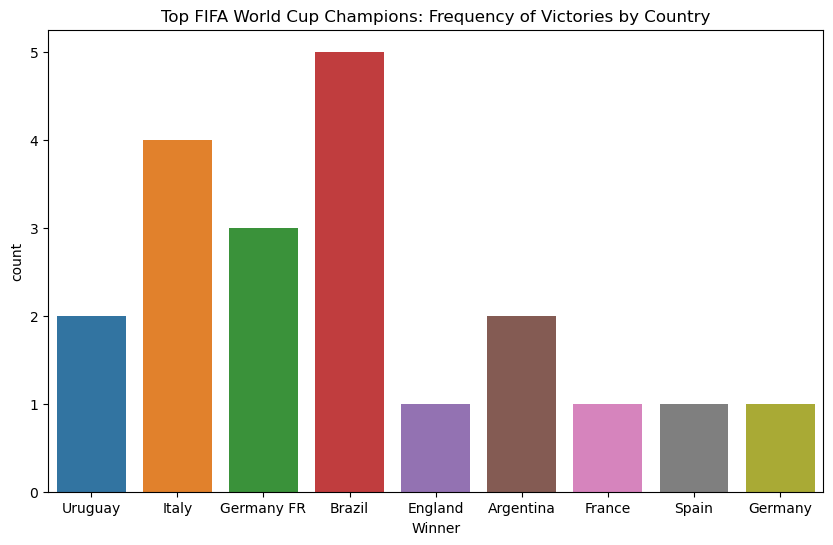

In [8]:
# first lets understand, which country hold maximum number of world cups
plt.figure(figsize=(10,6))
plt.title("Top FIFA World Cup Champions: Frequency of Victories by Country")
sns.countplot(x="Winner",data = wc_df)
plt.show()

* In the analysis of FIFA World Cup victories, Brazil emerges as the most successful nation with a record 5 championships. Italy follows closely with 4 titles, while GermanyFR holds 3. Argentina and Uruguay share the spotlight with 2 victories each.
* Note;  The "FR" likely stands for "Federal Republic," which is a historical term referring to West Germany. The full name "Germany" (GER) is used to represent the unified national football team since the reunification of West and East Germany in 1990.

### WHICH  COACH HAS TRAINED FOR THE LARGE NUMBER OF MATCHES ?

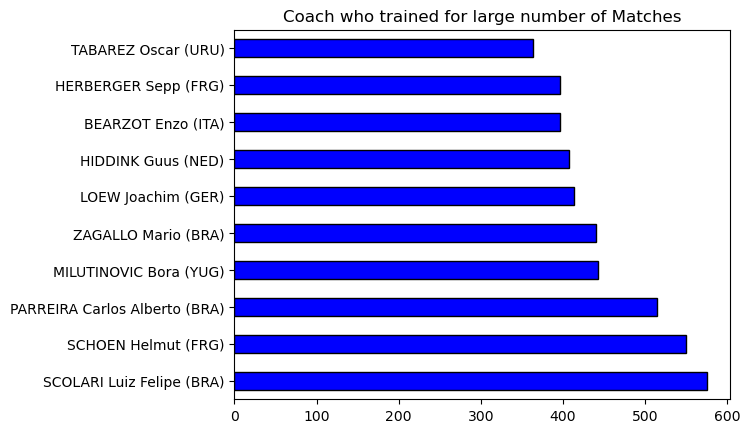

In [9]:
# Coach frequency 
wcp_df["Coach Name"].value_counts()[:10].plot(kind='barh',color="b",edgecolor='k',title="Coach who trained for large number of Matches")
plt.show()

* Luiz Felipe Scolari, a Brazilian coach, leads with 575 matches, followed by Helmut Schoen (FRG) and Carlos Alberto Parreira.

### GOALS SECURED

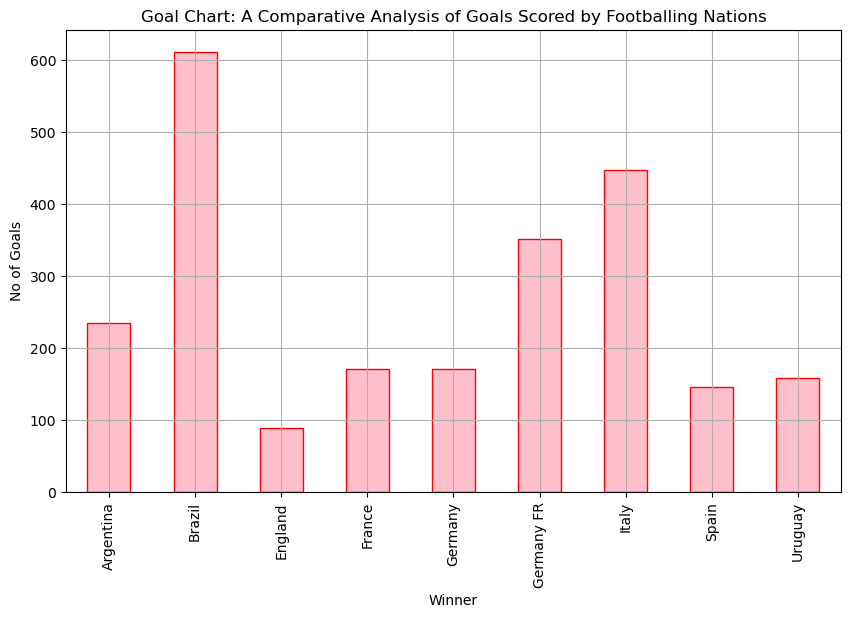

In [10]:
plt.figure(figsize=(10,6))
wc_df.groupby("Winner")["GoalsScored"].sum().plot(kind="bar",color="pink",edgecolor="r",title="Goal Chart: A Comparative Analysis of Goals Scored by Footballing Nations")
plt.ylabel("No of Goals")
plt.grid(True)
plt.show()

* In the rich tapestry of international football, the top five goal-scoring nations emerge as titans on the global stage. Brazil reigns supreme, standing at the pinnacle with an astonishing 612 goals, a testament to their enduring footballing legacy. Italy follows closely behind, showcasing a formidable offensive prowess with a total of 447 goals. The combined might of Germany, encompassing both Germany and Germany FR, secures them the third spot, boasting a noteworthy tally of 523 goals. Argentina, with 234 goals, and Uruguay, with 158 goals

### PLAYERS WHO MADE MOST NUMBER OF PLAY

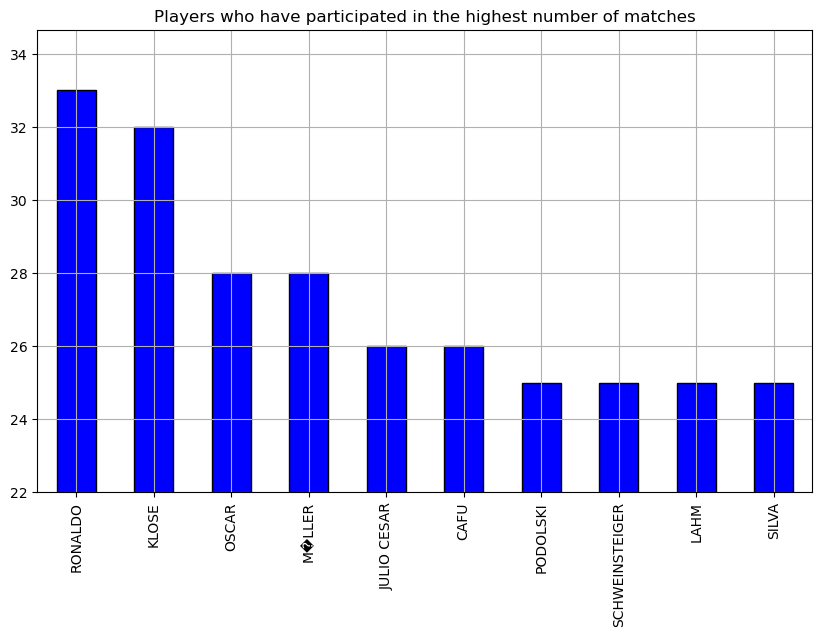

In [66]:
plt.figure(figsize=(10,6))
plt.title("Players who have participated in the highest number of matches")
wcp_df["Player Name"].value_counts()[:10].plot(kind="bar",color="b",edgecolor="k")
plt.ylim(22)
plt.grid(True)
plt.show()

#### * Ronaldo has made large number of matches.ie,33.After that KLOSE with 32 and then OSCAR and MULLER with 28

### WHICH YEAR MOST NUMBER OF TEAM HAS QUALIFIED

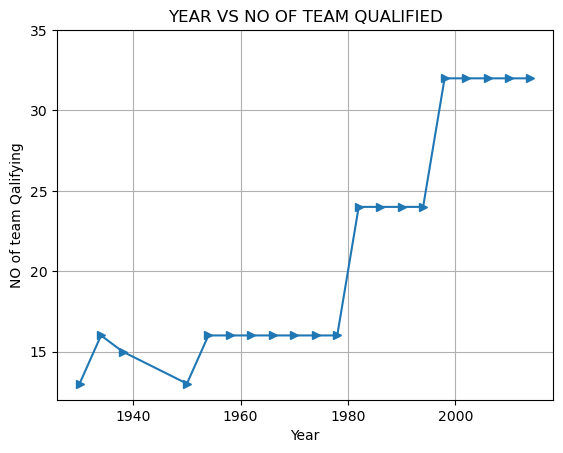

In [52]:
plt.title("YEAR VS NO OF TEAM QUALIFIED")
wc_df.groupby("Year")["QualifiedTeams"].sum().plot(marker=">")
plt.ylabel("NO of team Qalifying")
plt.ylim(12,35)
plt.grid(True)
plt.show()

* analysis of World Cup datasets reveals a consistent increase in the number of qualifying teams over time, indicating a trend towards greater inclusivity in global football. This insight highlights the evolving landscape of the sport and the expanding opportunities for nations to participate in one of the world's most prestigious sporting events.

### WHICH STADIUM MOST NUMBER OF MATCHES OCCUR

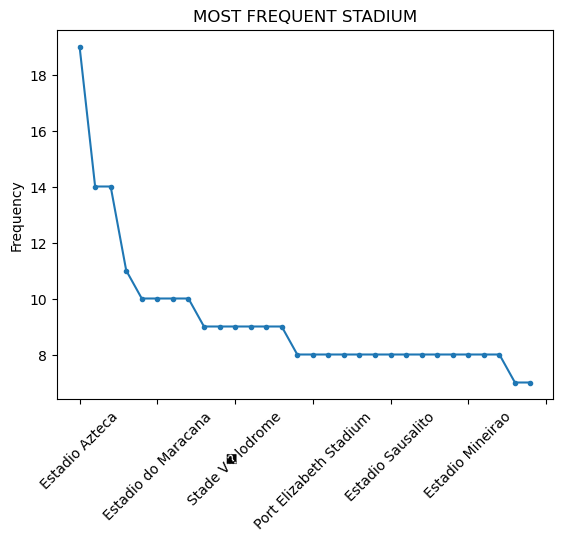

In [51]:
plt.title("MOST FREQUENT STADIUM")
wcm_df["Stadium"].value_counts()[:30].plot(marker=".")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [44]:
wcm_df["Stadium"].value_counts()[:10]

Estadio Azteca             19
Jalisco                    14
Olympiastadion             14
Nou Camp - Estadio Le�n    11
Estadio Centenario         10
Estadio do Maracana        10
Estadio Nacional           10
Nacional                   10
Wembley Stadium             9
Stade du Parc Lescure       9
Name: Stadium, dtype: int64

* Among the renowned stadiums where World Cup matches have occurred, Estadio Nacional stands out as a significant venue, hosting 10 matches throughout various tournaments.

### WHICH CITY MOST NUMBER OF MATCHES OCCCURED

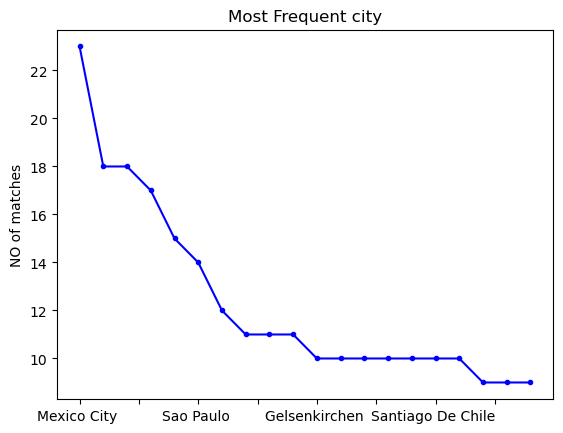

In [53]:
plt.title("Most Frequent city")
wcm_df["City"].value_counts()[:20].plot(color="b",marker=".")
plt.ylabel("NO of matches")
plt.show()

In [54]:
wcm_df["City"].value_counts()[:10]

Mexico City        23
Montevideo         18
Rio De Janeiro     18
Guadalajara        17
Johannesburg       15
Sao Paulo          14
Buenos Aires       12
Munich             11
Leon               11
Belo Horizonte     11
Name: City, dtype: int64

* Mexico City emerges as the most frequent host city for World Cup matches, with a staggering 23 games held within its iconic stadiums.

### MOST FREQUENTLY PARTICIPATED REFREE

In [56]:
wcm_df["Referee"].value_counts()[:20]

Ravshan IRMATOV (UZB)         10
RODRIGUEZ Marco (MEX)          8
LARRIONDA Jorge (URU)          8
ARCHUNDIA Benito (MEX)         8
QUINIOU Joel (FRA)             8
DE BLEECKERE Frank (BEL)       7
LANGENUS Jean (BEL)            7
WEBB Howard (ENG)              7
SIMON Carlos (BRA)             7
GARDEAZABAL Juan (ESP)         7
BUJSAIM Ali (UAE)              7
GRIFFITHS Benjamin (WAL)       7
ROSETTI Roberto (ITA)          6
Nicola RIZZOLI (ITA)           6
EL GHANDOUR Gamal (EGY)        6
LATYCHEV Nikolaj (URS)         6
RUIZ Oscar (COL)               6
BRIZIO CARTER Arturo (MEX)     6
ELLIS Arthur (ENG)             6
AL SHARIF Jamal (SYR)          6
Name: Referee, dtype: int64

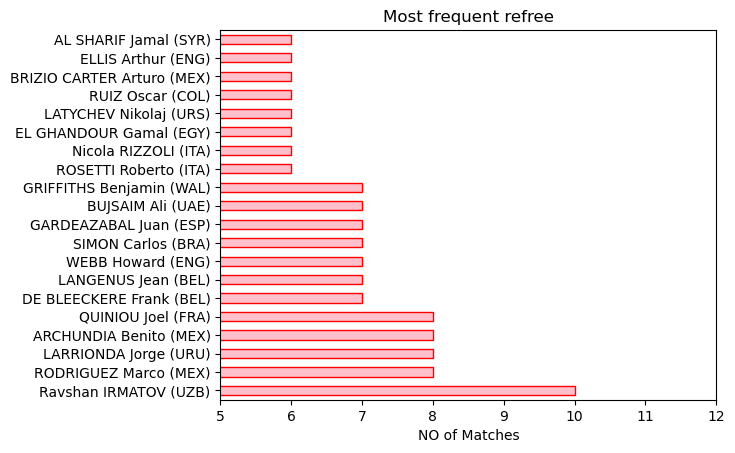

In [62]:
wcm_df["Referee"].value_counts()[:20].plot(kind="barh",color="pink",edgecolor="r",title="Most frequent refree")
plt.xlim(5,12)
plt.xlabel("NO of Matches")
plt.show()

* Ravshan Irmatov from Uzbekistan stands out as the most frequently participated referee in World Cup history, having officiated in 10 matches, showcasing his remarkable consistency and experience on the global stage.

